In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle


class_list = []

DATAPATH = "CK+48"

# veri setinde yer alan duyguların kategorileri
CATEGORIES = ["anger", "contempt", "disgust", "fear", "happy",
	      "sadness", "surprise"]

# fotoğrafların boyutu
IMGS = 48

# dosyada bulunan fotoğrafların kontrolü
for category in CATEGORIES :
	path = os.path.join(DATAPATH, category)
    
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATAPATH, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMGS, IMGS))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels


for features, label in training_data:
	X.append(features)
	y.append(label)
    
X = np.array(X).reshape(-1, IMGS, IMGS, 1)
y=np.array(y)

# veri seti ile ilgili bilgileri barındıran dosyaların oluşturulması  
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

Epoch 1/36
28/28 [==============================] - 1s 48ms/step - loss: 1.8496 - accuracy: 0.2180 - val_loss: 1.6911 - val_accuracy: 0.2755
Epoch 2/36
28/28 [==============================] - 1s 37ms/step - loss: 1.8069 - accuracy: 0.2831 - val_loss: 1.6198 - val_accuracy: 0.4082
Epoch 3/36
28/28 [==============================] - 1s 40ms/step - loss: 1.5333 - accuracy: 0.4954 - val_loss: 0.9486 - val_accuracy: 0.6939
Epoch 4/36
28/28 [==============================] - 1s 42ms/step - loss: 0.9772 - accuracy: 0.6073 - val_loss: 0.7762 - val_accuracy: 0.7143
Epoch 5/36
28/28 [==============================] - 1s 38ms/step - loss: 0.7848 - accuracy: 0.6906 - val_loss: 0.6036 - val_accuracy: 0.7959
Epoch 6/36
28/28 [==============================] - 1s 40ms/step - loss: 0.5917 - accuracy: 0.7900 - val_loss: 0.4823 - val_accuracy: 0.8673
Epoch 7/36
28/28 [==============================] - 1s 40ms/step - loss: 0.4699 - accuracy: 0.8402 - val_loss: 0.3231 - val_accuracy: 0.9184
Epoch 8/36
28

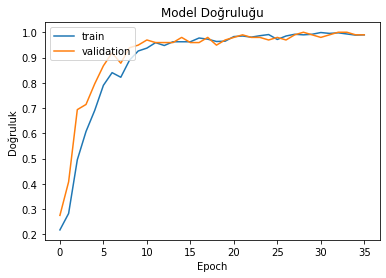

In [2]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# veriler ile ilgili dosyaların açılması
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# pixellerin normalleştirilmesi( 0’dan 255’ e) 
X = X/255.0

# modelin oluşturulması
model = Sequential()
# 3 convolutional katmanı oluşturulması
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden katmanı oluşturulması
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# 7 sınıf için 7 nöronlu output katmanı oluşturma
model.add(Dense(7))
model.add(Activation("softmax"))

# modelin derlenmesi
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# modelin 36 yineleme ile eğitilmesi

history = model.fit(X, y, batch_size=32, epochs=36, validation_split=0.1)

# modelin kayıt edilmesi
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# modelin eğitimi sırasında doğruluk oranında ki değişimi gösteren grafiğin bastırılması 
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')

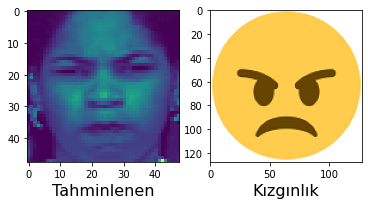

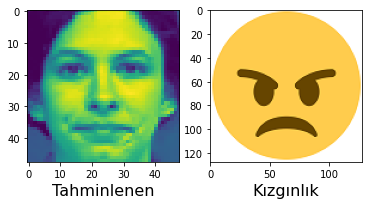

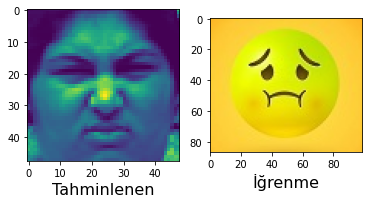

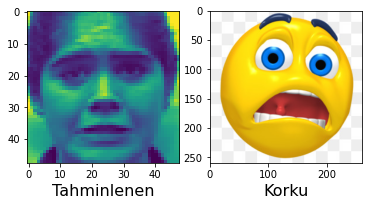

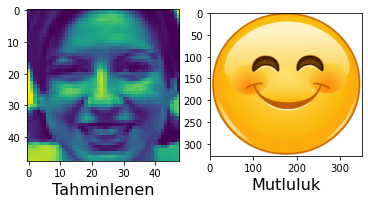

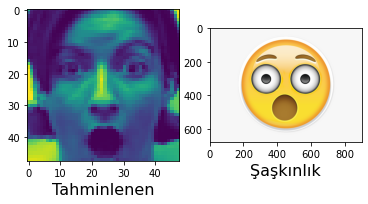

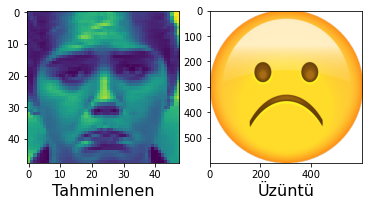

In [3]:
import cv2
import tensorflow as tf
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

model = tf.keras.models.load_model("CNN.model")

DATAPATH = "CK+48"
IMGS = 48
category = "test"
emoji = "temoji"

path = os.path.join(DATAPATH, category)
path2 = os.path.join(DATAPATH,emoji)


for img in os.listdir(path):

    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMGS, IMGS))
    new_array = np.array(new_array).reshape(-1, IMGS, IMGS, 1)
    
    prediction = model.predict(new_array)
    
    
    if prediction[0][0] == 1:
        fullp = path2 + "/" + "a.png"
        img=mpimg.imread(fullp)
        
        fig=plt.figure()
        fig.add_subplot(1,2,1)
        plt.imshow(img_array)
        plt.xlabel('Tahminlenen', fontsize = 16)
        
        fig.add_subplot(1,2,2)
        plt.imshow(img)
        plt.xlabel('Kızgınlık', fontsize=16)
        plt.show()
        
       
    elif prediction[0][1] == 1:  
        fullp = path2 + "/" + "c.png"  
        img=mpimg.imread(fullp)
        
        fig=plt.figure()
        fig.add_subplot(1,2,1)
        plt.imshow(img_array)
        plt.xlabel('Tahminlenen', fontsize = 16)
        
        fig.add_subplot(1,2,2)
        plt.imshow(img)
        plt.xlabel('Aşağılama', fontsize=16)
        plt.show()
        
    elif prediction[0][2] == 1:
        fullp = path2 + "/" + "d.jpg"
        img=mpimg.imread(fullp)
        
        fig=plt.figure()
        fig.add_subplot(1,2,1)
        plt.imshow(img_array)
        plt.xlabel('Tahminlenen', fontsize = 16)
        
        fig.add_subplot(1,2,2)
        plt.imshow(img)
        plt.xlabel('İğrenme', fontsize=16)
        plt.show()
    
    elif prediction[0][3] == 1:
        fullp = path2 + "/" + "f.jpg"
        img=mpimg.imread(fullp)
        
        fig=plt.figure()
        fig.add_subplot(1,2,1)
        plt.imshow(img_array)
        plt.xlabel('Tahminlenen', fontsize = 16)
        
        fig.add_subplot(1,2,2)
        plt.imshow(img)
        plt.xlabel('Korku', fontsize=16)
        plt.show()
        
    elif prediction[0][4] == 1:
        fullp = path2 + "/" + "h.png"
        img=mpimg.imread(fullp)
        
        fig=plt.figure()
        fig.add_subplot(1,2,1)
        plt.imshow(img_array)
        plt.xlabel('Tahminlenen', fontsize = 16)
        
        fig.add_subplot(1,2,2)
        plt.imshow(img)
        plt.xlabel('Mutluluk', fontsize=16)
        plt.show()
        
    elif prediction[0][5] == 1:
        fullp = path2 + "/" + "sa.png"
        img=mpimg.imread(fullp)
        
        fig=plt.figure()
        fig.add_subplot(1,2,1)
        plt.imshow(img_array)
        plt.xlabel('Tahminlenen', fontsize = 16)
        
        fig.add_subplot(1,2,2)
        plt.imshow(img)
        plt.xlabel('Üzüntü', fontsize=16)
        plt.show()
        
    elif prediction[0][6] == 1:
        fullp = path2 + "/" + "s.png"
        img=mpimg.imread(fullp)
        
        fig=plt.figure()
        fig.add_subplot(1,2,1)
        plt.imshow(img_array)
        plt.xlabel('Tahminlenen', fontsize = 16)
        
        fig.add_subplot(1,2,2)
        plt.imshow(img)
        plt.xlabel('Şaşkınlık', fontsize=16)
        plt.show()